In [188]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [189]:
## Implementation of SVM algorithm ##
class SVM:
    def __init__(self, lr=0.001, lambda_param=0.01, n_iters=2000):
        self.lr = lr                          # learning rate
        self.lambda_param = lambda_param      # regularization strength
        self.n_iters = n_iters                # number of training iterations
        self.w = None                         # weight vector
        self.b = None                         # bias term
        self.loss_history = []                # track the loss during training

    def _hinge_loss(self, margins):
        """Compute the hinge loss + regularization"""
        losses = np.maximum(0, margins)   # hinge loss part
        loss = np.mean(losses) + 0.5 * self.lambda_param * np.sum(self.w ** 2)
        return loss

    def _scores(self, X, w, b):
        """Compute f(x) = w·x + b"""
        return np.dot(X, w) + b
    
    def fit(self, X, y, verbose=False):
        """Train the SVM model using gradient descent"""
        # Ensure labels are -1 and +1
        y = np.where(y <= 0, -1, 1)

        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0.0

        for it in range(self.n_iters):
            # Compute margins: 1 - y * (w·x + b)
            scores = self._scores(X, self.w, self.b)
            margins = 1 - y * scores

            # Compute loss and store it
            loss = self._hinge_loss(margins)
            self.loss_history.append(loss)

            # Indicator function: active only if margin > 0
            mask = margins > 0

            # Gradients (directly from the math formulas)
            dw,db = self._gradients(X,y,self.w,n_samples,mask)

            # Update parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # (Optional) Show progress
            if verbose and it % 100 == 0:
                print(f'Iteration {it}/{self.n_iters} - Loss: {loss:.4f}')
        if verbose:
            self._plot_loss()
        
    def predict(self,X):
        aproxx = self._scores(X,self.w,self.b)
        return np.sign(aproxx)
        
    def _gradients(self,X,y,w,n_samples,mask):
        """Calculate the gradients of the parameters"""
        dw = self.lambda_param * w - (1/n_samples) * np.sum((mask * y)[:, None] * X, axis=0)
        db = -(1/n_samples) * np.sum(mask * y)
        return dw,db
    
    def _plot_loss(self):
        """Plot the error history"""
        plt.figure(figsize=(8,6))
        sns.lineplot(x=range(len(self.loss_history)), y=self.loss_history)
        plt.title('Loss History')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.show()

In [190]:
from sklearn.datasets import make_blobs

# Dataset
X, y = make_blobs(n_samples=200, n_features=2, centers=2, random_state=42)
y = np.where(y == 0, -1, 1)  # Convertimos etiquetas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Iteration 0/7000 - Loss: 1.0000
Iteration 100/7000 - Loss: 0.7550
Iteration 200/7000 - Loss: 0.5103
Iteration 300/7000 - Loss: 0.3578
Iteration 400/7000 - Loss: 0.2819
Iteration 500/7000 - Loss: 0.2134
Iteration 600/7000 - Loss: 0.1565
Iteration 700/7000 - Loss: 0.1129
Iteration 800/7000 - Loss: 0.0830
Iteration 900/7000 - Loss: 0.0657
Iteration 1000/7000 - Loss: 0.0539
Iteration 1100/7000 - Loss: 0.0460
Iteration 1200/7000 - Loss: 0.0398
Iteration 1300/7000 - Loss: 0.0343
Iteration 1400/7000 - Loss: 0.0304
Iteration 1500/7000 - Loss: 0.0268
Iteration 1600/7000 - Loss: 0.0242
Iteration 1700/7000 - Loss: 0.0225
Iteration 1800/7000 - Loss: 0.0213
Iteration 1900/7000 - Loss: 0.0202
Iteration 2000/7000 - Loss: 0.0193
Iteration 2100/7000 - Loss: 0.0185
Iteration 2200/7000 - Loss: 0.0177
Iteration 2300/7000 - Loss: 0.0170
Iteration 2400/7000 - Loss: 0.0163
Iteration 2500/7000 - Loss: 0.0157
Iteration 2600/7000 - Loss: 0.0151
Iteration 2700/7000 - Loss: 0.0145
Iteration 2800/7000 - Loss: 0.01

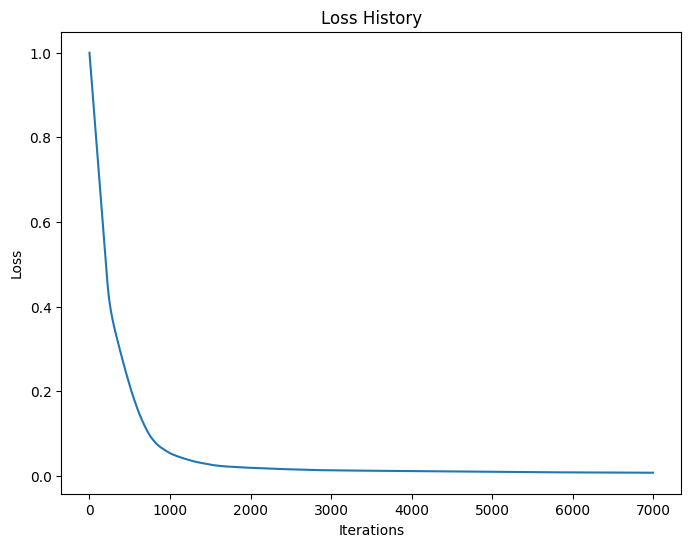

In [191]:
# Fit the model
svm = SVM(lr=0.0001,n_iters=7000)
svm.fit(X_train,y_train,verbose=True)

In [192]:
# Accuracy
train_acc = np.mean(svm.predict(X_train) == y_train)
test_acc = np.mean(svm.predict(X_test) == y_test)
print(f"Accuracy train: {train_acc*100:.2f}%, test: {test_acc*100:.2f}%")

Accuracy train: 100.00%, test: 100.00%
